# Rendu Coding Challenge Apprenti Saoud Johanna

Dans le cadre de ce challenge il a été demandé de prédire le score de qualité d'un vin et de le classifier comme étant bon ou mauvais, à partir d'un set de données.

In [1]:
# Importation des librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [2]:
#Importation des données et création du dataframe

data = pd.read_csv('C:/Users/saoud/Downloads/winequality-red.csv', encoding='utf8',sep=';')
data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploration des données

L'exploration des données va permettre de découvrir les données avec plus de clairté et une meilleure compréhension des données 


In [3]:
# Information sur les données 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


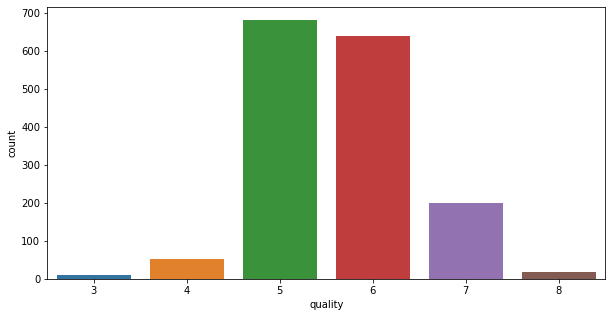

In [6]:
plt.figure(figsize = (10,5))
sns.countplot(data['quality'])
plt.show()

### Impact des différents paramètres sur le score de qualité 

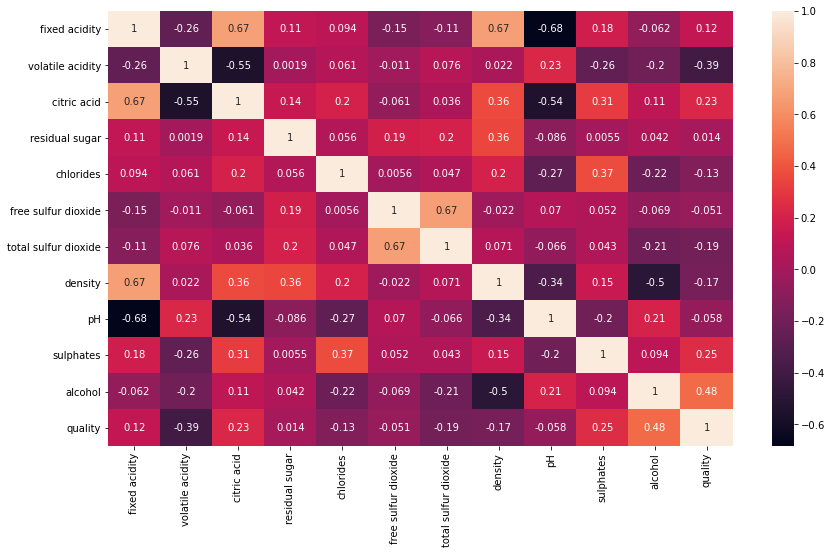

In [7]:
# Génération d'une matrice de corrélation afin de voir les impacts positifs ou négatifs des parmètres sur le score de qualité

plt.figure(figsize=[14,8])
sb.heatmap(data.corr(),annot=True)
plt.show()

On remarque que l'alcool, les sulphates et l'acide citrique peuvent avoir un impact positif sur la qualité. A l'inverse, l'acidité volatil présente un impact négatif sur le score de qualité. On peut aussi voir qu'il existe des paramètres ayant un très faible impact sur le score comme par exemple les sucres résiduels, le ph ou encore le dioxyde de soufre libre.

Génération d'autres graphiques afin d'observer un peu mieux les hypothèses émisent grâce à la matrice de corrélation :

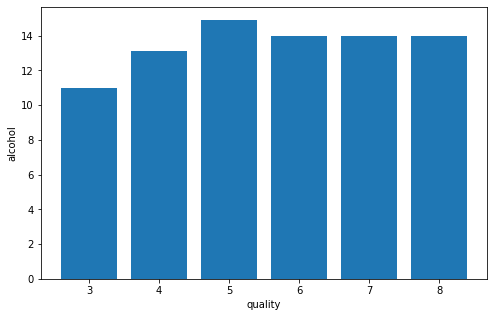

In [8]:
# alcool et qualité 

plt.figure(figsize=[8,5])
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

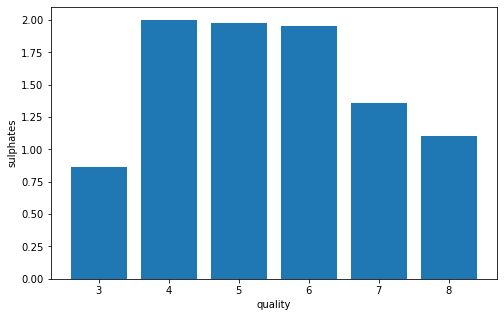

In [9]:
# sulphates et qualité 

plt.figure(figsize=[8,5])
plt.bar(data['quality'],data['sulphates'])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

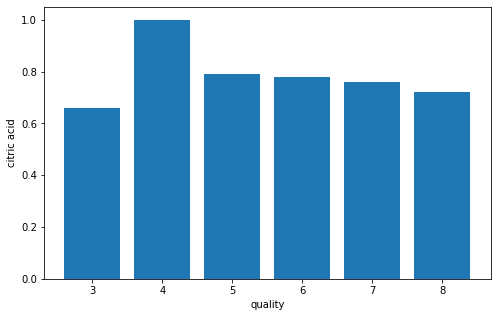

In [10]:
# citric acid et qualité 

plt.figure(figsize=[8,5])
plt.bar(data['quality'],data['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()


Pour les paramètres acide citrique, alcool et sulphate, on peut effectivement observer un petit impact positif sur le score de qualité. Il peut cependant exister des interractions entre les differents paramètres qui pourrait peut etre amoindrir l'impact positif. 

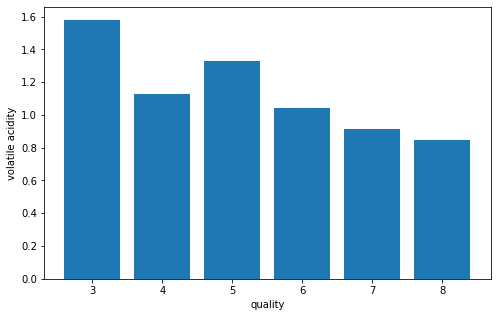

In [11]:
# volatile acidity et qualité 

plt.figure(figsize=[8,5])
plt.bar(data['quality'],data['volatile acidity'])
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

On remarque que l'acidité volatile a effectivement un impact négatif sur le score de qualité (plus il y en a, moins le score est élevé)

### Prédiction du score de qualité et classification en bonne ou mauvaise qualité


In [12]:
# Préparation des variables et séparation du jeu de donnée

data2=data
X=data2.drop(['quality'],axis=1)
y=data2['quality']



In [13]:
# Création d'un jeu d'apprentissage et de test

# 70% pour le set d'apprentissage
# 30% pour le test

trainsize=0.7 
testsize= 0.3
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=trainsize, 
                                               random_state=seed,
                                               test_size=testsize)

In [14]:
print(y.shape, y_test.shape, y_train.shape)

(1599,) (480,) (1119,)


Afin d'effectuer la prédiction de la note de qualité du vin de 0 à 10, j'ai choisis d'effectuer en premier temps une régréssion linéaire : 

In [15]:
#Régréssion Linéaire

reg = LinearRegression().fit(X_train, y_train)


In [16]:
# Affichage des valeurs prédites


reg_res = reg.predict(np.array(X_test ))
print(reg_res)

[6.24296697 5.42745542 5.56210168 5.08703563 5.80454291 5.15358877
 5.19298646 4.96524896 5.42057197 5.0595798  5.10057439 6.19288969
 5.38328974 5.74135592 6.61309857 5.80337423 4.98713678 5.21394893
 6.25165025 5.60545183 5.25115947 6.2488561  6.24295954 4.53139281
 6.06964261 5.57866159 5.8018105  5.26102261 5.51219259 5.7362369
 5.11829923 5.69862911 5.66433213 5.72565198 5.42118417 6.60905584
 5.9771274  5.47586843 5.31629505 6.44941914 4.87466847 5.75220879
 6.16403784 5.52310303 5.33905057 6.54461115 6.00226531 6.22321633
 5.36693619 5.25002735 5.76424759 5.75219279 5.49415913 4.98084094
 5.33570281 5.77330083 5.73793678 5.35802808 5.07860374 5.53350232
 5.34229444 5.4548991  6.43118181 5.4861174  6.15585607 5.79982663
 5.49928205 5.39172119 5.1340327  5.66761541 5.39580736 5.16177855
 5.48573226 5.66601874 6.04973826 5.43263501 6.35262286 5.39401265
 5.73145616 5.61776638 6.91388856 6.1944966  6.1253398  5.48280513
 5.14269404 5.17335777 4.98757376 5.77506472 5.14812415 5.79506

Comme les notes de qualité sont des int, je choisis de modifier les prédictions qui sont des float, en int, en arrondissant : 

In [17]:
reg_res_int = reg_res
for i in range(len(reg_res_int)):
    if (reg_res_int[i] - int(reg_res_int[i])) < 0.5:
        reg_res_int[i] = int(reg_res_int[i]) 
    else:
        reg_res_int[i] = int(reg_res_int[i])+1

print('La liste des notes prédite est la suivante : ',reg_res_int)

La liste des notes prédite est la suivante :  [6. 5. 6. 5. 6. 5. 5. 5. 5. 5. 5. 6. 5. 6. 7. 6. 5. 5. 6. 6. 5. 6. 6. 5.
 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 5. 7. 6. 5. 5. 6. 5. 6. 6. 6. 5. 7. 6. 6.
 5. 5. 6. 6. 5. 5. 5. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 5. 5.
 5. 6. 6. 5. 6. 5. 6. 6. 7. 6. 6. 5. 5. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.
 5. 6. 5. 5. 5. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5. 5. 5. 6. 7. 6. 6. 6. 5. 6.
 6. 6. 6. 6. 6. 5. 7. 6. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 5. 5. 5.
 6. 6. 5. 5. 6. 7. 5. 6. 5. 6. 6. 6. 6. 6. 4. 5. 5. 6. 5. 5. 6. 5. 5. 5.
 6. 6. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 6. 5. 5.
 6. 6. 6. 5. 7. 6. 5. 7. 6. 5. 5. 5. 6. 6. 6. 6. 6. 6. 7. 5. 7. 5. 5. 5.
 5. 6. 6. 7. 6. 7. 6. 6. 5. 6. 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 5. 6. 6. 6.
 5. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 6. 5. 5. 6. 6.
 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 5. 5. 5. 6. 6.
 6. 6. 5. 5. 6. 7. 6. 5. 5. 6. 6. 6. 5. 6. 6. 5. 6. 5. 6. 6. 6. 6. 5. 5.
 6. 6

La prédiction des scores de qualité est faite. A l'aide d'une simple boucle, je vais pouvoir classifier les notes prédites en GOOD ou BAD qualité. J'ai choisi de fixer à 7 la note minimal pour etre qualifier de GOOD. 

In [18]:
reg_res_bg = list(reg_res_int)

for i in range(len(reg_res_bg)):
    if (reg_res_bg[i] < 7) :
        reg_res_bg[i] = "BAD"
    else:
        reg_res_bg[i] = "GOOD"

print('Il y a ',reg_res_bg.count('GOOD'), 'GOOD parmis les prédictions.')
print('Il y a ',reg_res_bg.count('BAD'), 'BAD parmis les prédictions.')

Il y a  22 GOOD parmis les prédictions.
Il y a  458 BAD parmis les prédictions.


#### Evaluation de la fiabilité et pertinance du modèle Régréssion Linéaire : 

In [19]:
# Transformation du set de test contenant les notes réels en BAD ou GOOD 

y_test_bg = list(y_test)

for i in range(len(y_test_bg)):
    if (y_test_bg[i] < 7) :
        y_test_bg[i] = "BAD"
    else:
        y_test_bg[i] = "GOOD"
        

print('Il y a ',y_test_bg.count('GOOD'), 'GOOD parmis les prédictions.')
print('Il y a ',y_test_bg.count('BAD'), 'BAD parmis les prédictions.')

Il y a  64 GOOD parmis les prédictions.
Il y a  416 BAD parmis les prédictions.


In [20]:
# Comparaison de ce set avec la prediction à l'aide d'une matrice de confusion

a = confusion_matrix(y_test_bg, reg_res_bg)

print('Il y a', a[0][0], 'Vrai Négatif.')
print('Il y a', a[1][0], 'Faux Négatif.')
print('Il y a', a[1][1], 'Vrai Positif.')
print('Il y a', a[0][1], 'Faux positif.')


Il y a 407 Vrai Négatif.
Il y a 51 Faux Négatif.
Il y a 13 Vrai Positif.
Il y a 9 Faux positif.


Evaluation de la prédiction à l'aide de l'erreur quadratique moyenne qui va calculer le carré des erreurs résiduelles, pour en faire la moyenne

In [21]:
from math import *
from sklearn.metrics import *

print('MSE :', mean_absolute_error(y_test, reg_res_int))

print('RMSE :', np.sqrt(mean_absolute_error(y_test, reg_res_int)))

MSE : 0.44375
RMSE : 0.6661456297237114


#### Prédiction des notes à l'aide d'autres modèles :

Par curiosité j'ai voulu tester si avec d'autres modèles on pouvait obtenir une meilleur prédiction des notes,j'ai donc choisi de tester 2 modèles :

In [22]:
# RandomForest 

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
predictions=rf.predict(np.array(X_test ))

print("Le score d'accuracy pour la RandomForest est : ", accuracy_score(y_test, predictions))

Le score d'accuracy pour la RandomForest est :  0.68125


In [23]:
# DecisionTree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(np.array(X_test ))

accuracy_score(y_test, pred)
print("Le score d'accuracy pour la DecisionTree est : ", accuracy_score(y_test, pred))

Le score d'accuracy pour la DecisionTree est :  0.5791666666666667


-------------------------------------------------------------------------------------------------------------------------------

### Partie avec données du debut binarisée


Dans la continuité de cette idée, j'ai voulu savoir si on obtenait de meilleur prédiction de classification en binarisant les données dès le début. En effet dans un premier temps j'ai commencé les simulations avec les notes de 0 à 10. Dans cette partie,  je vais les binariser dès le début et voir si ainsi on obtient une meilleur classification.  

In [24]:

data3=data

X3=data3.drop(['quality'],axis=1)

#Binarisation des données 

y3 = data3['quality'].apply(lambda Y_value: 1 if Y_value>=7 else 0)


In [25]:
# Création d'un jeu d'apprentissage et de test

# 70% pour le set d'apprentissage
# 30% pour le test

trainsize2=0.7 
testsize2= 0.3
seed2=30
X3_train,X3_test,y3_train,y3_test=train_test_split(X3, 
                                               y3, 
                                               train_size=trainsize2, 
                                               random_state=seed2,
                                               test_size=testsize2)



In [26]:
print(y3.shape, y3_test.shape, y3_train.shape)

(1599,) (480,) (1119,)


In [27]:
# Régréssion logistique

lr = LogisticRegression().fit(X3_train, y3_train)
lr_res = lr.predict(np.array(X3_test))
print(lr_res)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [28]:
print(classification_report(y3_test, lr_res))
print("L'accuracy pour la Régréssion Logistique est égale à :",accuracy_score(y3_test, lr_res))



              precision    recall  f1-score   support

           0       0.89      0.97      0.93       416
           1       0.54      0.23      0.33        64

    accuracy                           0.87       480
   macro avg       0.71      0.60      0.63       480
weighted avg       0.84      0.87      0.85       480

L'accuracy pour la Régréssion Logistique est égale à : 0.8708333333333333


Matrice de confusion :
TN:  403
FN:  49
TP:  15
FP:  13


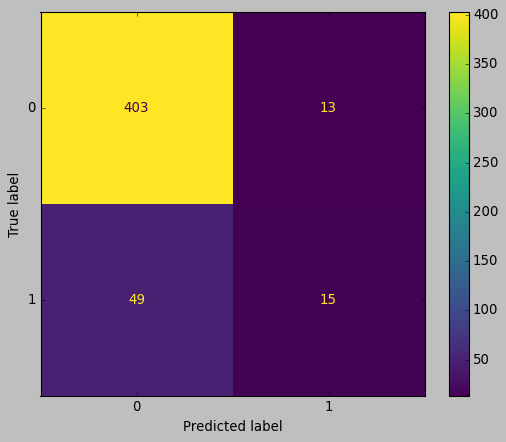

In [29]:
print("Matrice de confusion :")
style.use('classic')
cm = confusion_matrix(y3_test, lr_res, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=lr.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])


In [30]:
#DecisionTree

dt = DecisionTreeClassifier().fit(X3_train, y3_train)
dt_res = dt.predict(np.array(X3_test ))
print(dt_res)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0]


In [31]:
print(classification_report(y3_test, dt_res))
print("L'accuracy pour la Régréssion Logistique est égale à :",accuracy_score(y3_test, dt_res))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       416
           1       0.52      0.58      0.55        64

    accuracy                           0.87       480
   macro avg       0.73      0.75      0.74       480
weighted avg       0.88      0.87      0.88       480

L'accuracy pour la Régréssion Logistique est égale à : 0.8729166666666667


Matrice de confusion :
TN:  382
FN:  27
TP:  37
FP:  34


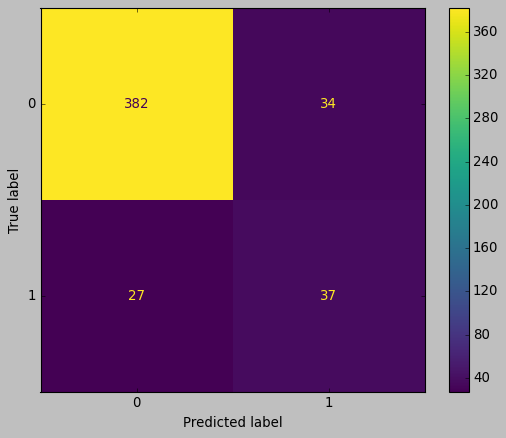

In [32]:
print("Matrice de confusion :")
style.use('classic')
cm = confusion_matrix(y3_test, dt_res, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dt.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [33]:
#RandomForest

rf = RandomForestClassifier(random_state = 42).fit(X3_train, y3_train)
rf_res = rf.predict(np.array(X3_test ))
print(rf_res)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0]


In [34]:
print(classification_report(y3_test, rf_res))
print("L'accuracy pour la Régréssion Logistique est égale à :",accuracy_score(y3_test, rf_res))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       416
           1       0.69      0.62      0.66        64

    accuracy                           0.91       480
   macro avg       0.82      0.79      0.80       480
weighted avg       0.91      0.91      0.91       480

L'accuracy pour la Régréssion Logistique est égale à : 0.9125


Matrice de confusion :
TN:  398
FN:  24
TP:  40
FP:  18


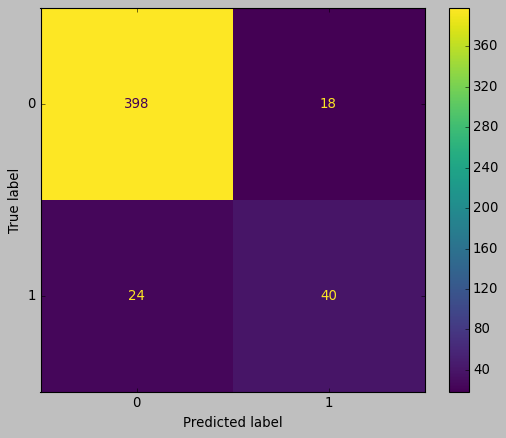

In [36]:
print("Matrice de confusion :")
style.use('classic')
cm = confusion_matrix(y3_test, rf_res, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rf.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

L'accuracy de ces modèles est nettement plus interessante que celles obtenu à partir des notes de 0 à 10. 